<a href="https://colab.research.google.com/github/paardhavlaveti/Spam-Mail-classifier/blob/main/Spam_Mail_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam-Mail Predictor**

# **Load Data**

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/akashdeep364/Spam-Mail-Prediction/refs/heads/main/mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Data Preperation**

## **Data Seperation as X and y**

In [ ]:
y=df['Category']
y

,Category
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [ ]:
X=df.drop(columns='Category',axis=1)
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


## **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Message
1978,Reply to win £100 weekly! Where will the 2006 ...
3989,Hello. Sort of out in town already. That . So ...
3935,How come guoyang go n tell her? Then u told her?
4078,Hey sathya till now we dint meet not even a si...
4086,Orange brings you ringtones from all time Char...
...,...
3772,"Hi, wlcome back, did wonder if you got eaten b..."
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [ ]:
X_test

,Message
3245,Squeeeeeze!! This is christmas hug.. If u lik ...
944,And also I've sorta blown him off a couple tim...
1044,Mmm thats better now i got a roast down me! i...
2484,Mm have some kanji dont eat anything heavy ok
812,So there's a ring that comes with the guys cos...
...,...
4264,Den only weekdays got special price... Haiz......
2439,I not busy juz dun wan 2 go so early.. Hee..
5556,Yes i have. So that's why u texted. Pshew...mi...
4205,How are you enjoying this semester? Take care ...


# **Model Building**

## **Logistic Regression**

### **Training the Model**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train['Message'])
X_test_transformed = tfidf_vectorizer.transform(X_test['Message'])


model=LogisticRegression()
model.fit(X_train_transformed,y_train)

LogisticRegression()

### **Applying the Model to make a prediction**

In [18]:
y_lr_train_pred=model.predict(X_train_transformed)
y_lr_test_pred=model.predict(X_test_transformed)

In [19]:
y_lr_train_pred

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [20]:
y_lr_test_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

### **Evaluate Model Performance**

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
print(accuracy_score(y_train,y_lr_train_pred))
print(accuracy_score(y_test,y_lr_test_pred))

0.9768902849450303
0.9766816143497757


## **Decision Tree**

### **Training the Model**

In [23]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier(random_state=42)

### **Applying the Model to make a prediction**

In [24]:
y_dt_train_pred = decision_tree_model.predict(X_train_transformed)
y_dt_test_pred = decision_tree_model.predict(X_test_transformed)

### **Evaluate Model Performance**



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Decision Tree Model Performance:")
print("Training Accuracy:", accuracy_score(y_train, y_dt_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_dt_test_pred))

Decision Tree Model Performance:
Training Accuracy: 0.9997756338344178
Testing Accuracy: 0.9623318385650225


# **Comparision of Models**

In [31]:
df_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Training Accuracy': [accuracy_score(y_train, y_lr_train_pred), accuracy_score(y_train, y_dt_train_pred)],
    'Testing Accuracy': [accuracy_score(y_test, y_lr_test_pred), accuracy_score(y_test, y_dt_test_pred)]
})

display(df_results)

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.976890,0.976682
1,Decision Tree,0.999776,0.962332


# **Data Visualization of Prediction Results**

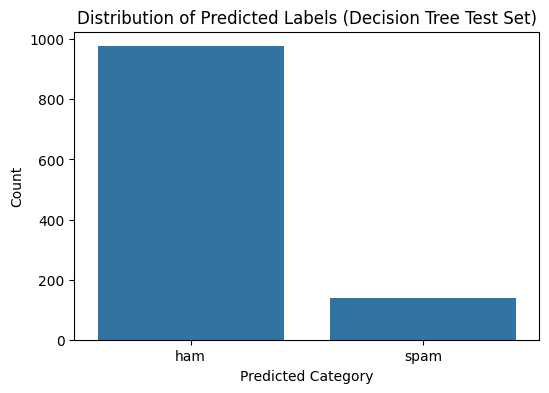

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_dt_test_pred_series = pd.Series(y_dt_test_pred)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_dt_test_pred_series)
plt.title('Distribution of Predicted Labels (Decision Tree Test Set)')
plt.xlabel('Predicted Category')
plt.ylabel('Count')
plt.show()